In [2]:
!pip install sagemaker==1.72.0

Keyring is skipped due to an exception: 'keyring.backends'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 3.4 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for sagemaker: filename=sagemaker-1.72.0-py2.py3-none-any.whl size=386379 sha256=57d3a2ba9c12189c49f031201ac5cc12f99dbc0113bf462fd76022993503bfdf
  Stored in directory: /root/.cache/pip/wheels/13/a4/61/28b2274865ad7d532701e39d8913288da38768f453cde3cd82
Successfully built sagemaker
  Attempting uninstall: smdebug-rulesconfig
    Found existing installation: smdebug-rulesconfig 1.0.1
    Uninstalling smdebug-rulesconfig-1.0.1:
      Successfully uninstalled smdebug-rulesconfig-1.0.1
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 1.0.1
    Uninstalling sagemaker-1.0.1:
      Successfully uninstalled sagemaker-1.0.1


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
bot_creditdf = pd.read_csv("BoT_Credit_Card.csv")

In [5]:
bot_creditdf

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [6]:
bot_creditdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
bot_creditdf.describe()
#describing dataset to derive average, min, max and limit balance values

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
#dropping ID column, not necessary for immediate analysis
bot_creditdf.drop(['ID'], axis=1, inplace=True)

In [9]:
#verifying if data contains null elemets
sns.heatmap(bot_creditdf.isnull(), cmap = 'Blues')


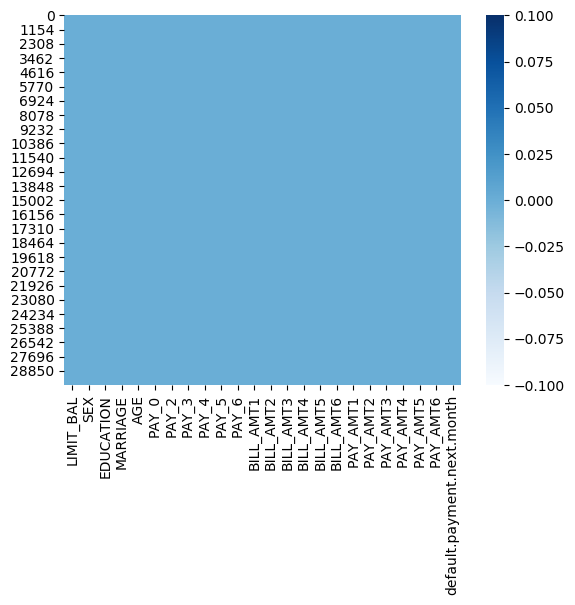

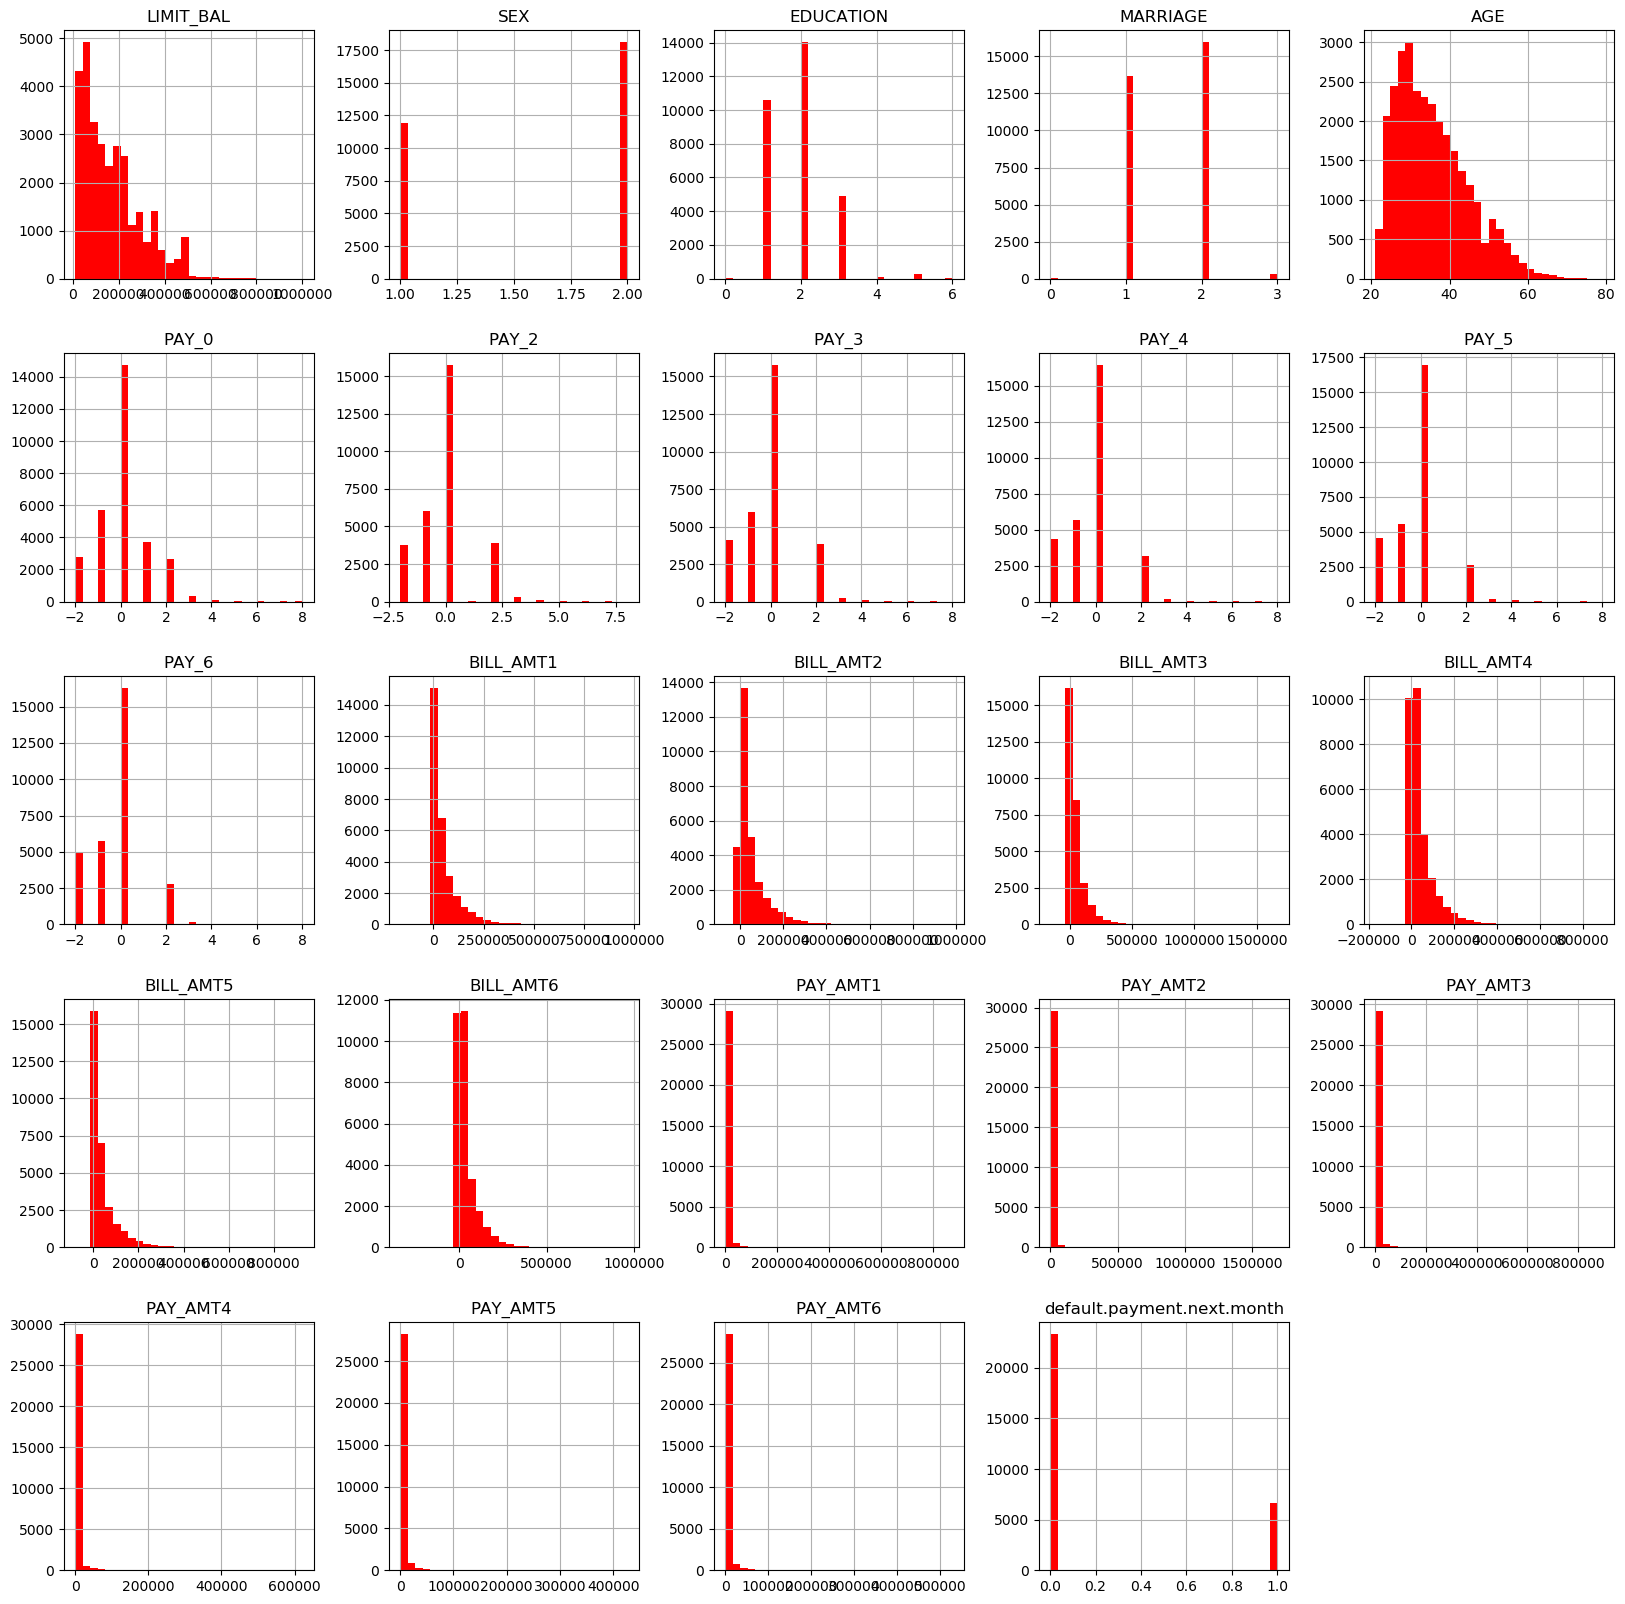

In [10]:
#displaying histograms for all data columns to understand
#data distribution

bot_creditdf.hist(bins = 30, figsize = (20,20), color = 'r')
plt.show()

In [11]:
#grouping potential defaulters and non-defaulters
bot_credit_defaultdf = bot_creditdf[bot_creditdf['default.payment.next.month']== 1]
bot_credit_nodefaultdf = bot_creditdf[bot_creditdf['default.payment.next.month']== 0]


In [12]:
#Determining total number of clients
print("Total number of clients is", len(bot_creditdf))
      
#For defaulters
print("Total number of defaulters is", len(bot_credit_defaultdf))
print("Total percentage of defaulters is", 1.*len(bot_credit_defaultdf)/len(bot_creditdf)*100.0, "%") 
      
#for nondefaulters
      
print("Total number of non-defaulters is", len(bot_credit_nodefaultdf))
print("Total percentage of non-defaulters is", 1.*len(bot_credit_nodefaultdf)/len(bot_creditdf)*100.0, "%") 
      

Total number of clients is 30000
Total number of defaulters is 6636
Total percentage of defaulters is 22.12 %
Total number of non-defaulters is 23364
Total percentage of non-defaulters is 77.88000000000001 %


In [13]:
#mean and stddev of defaulters
bot_credit_defaultdf.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,1.482833,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [14]:
bot_credit_nodefaultdf.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,0.977591,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


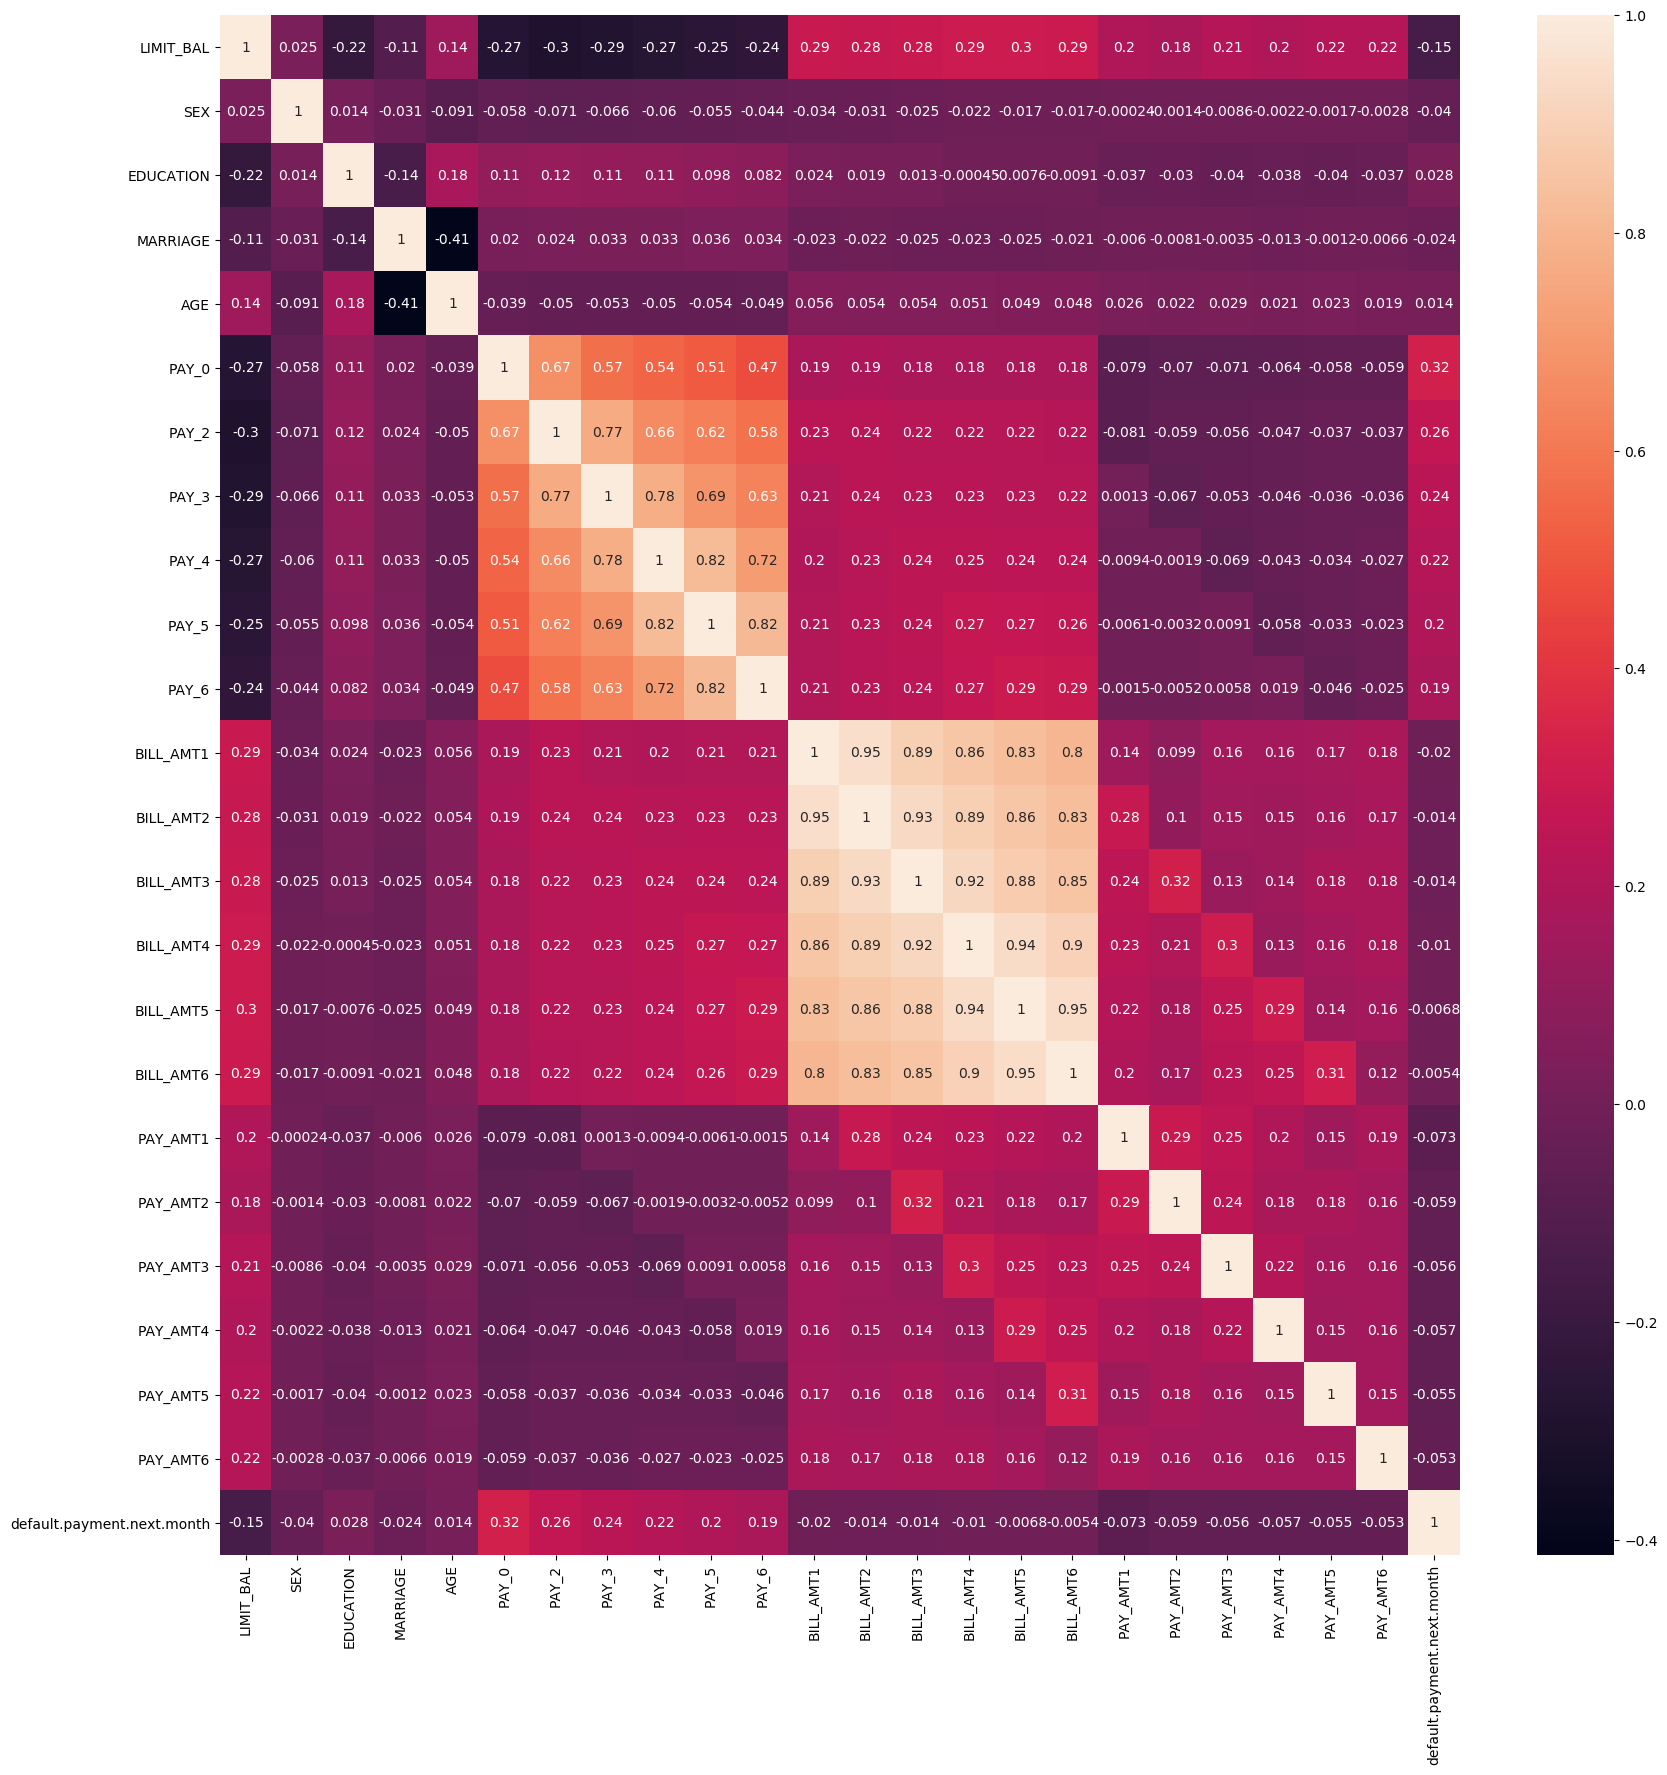

In [15]:
#correlations between features
correlation = bot_creditdf.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlation, annot = True)
plt.show()

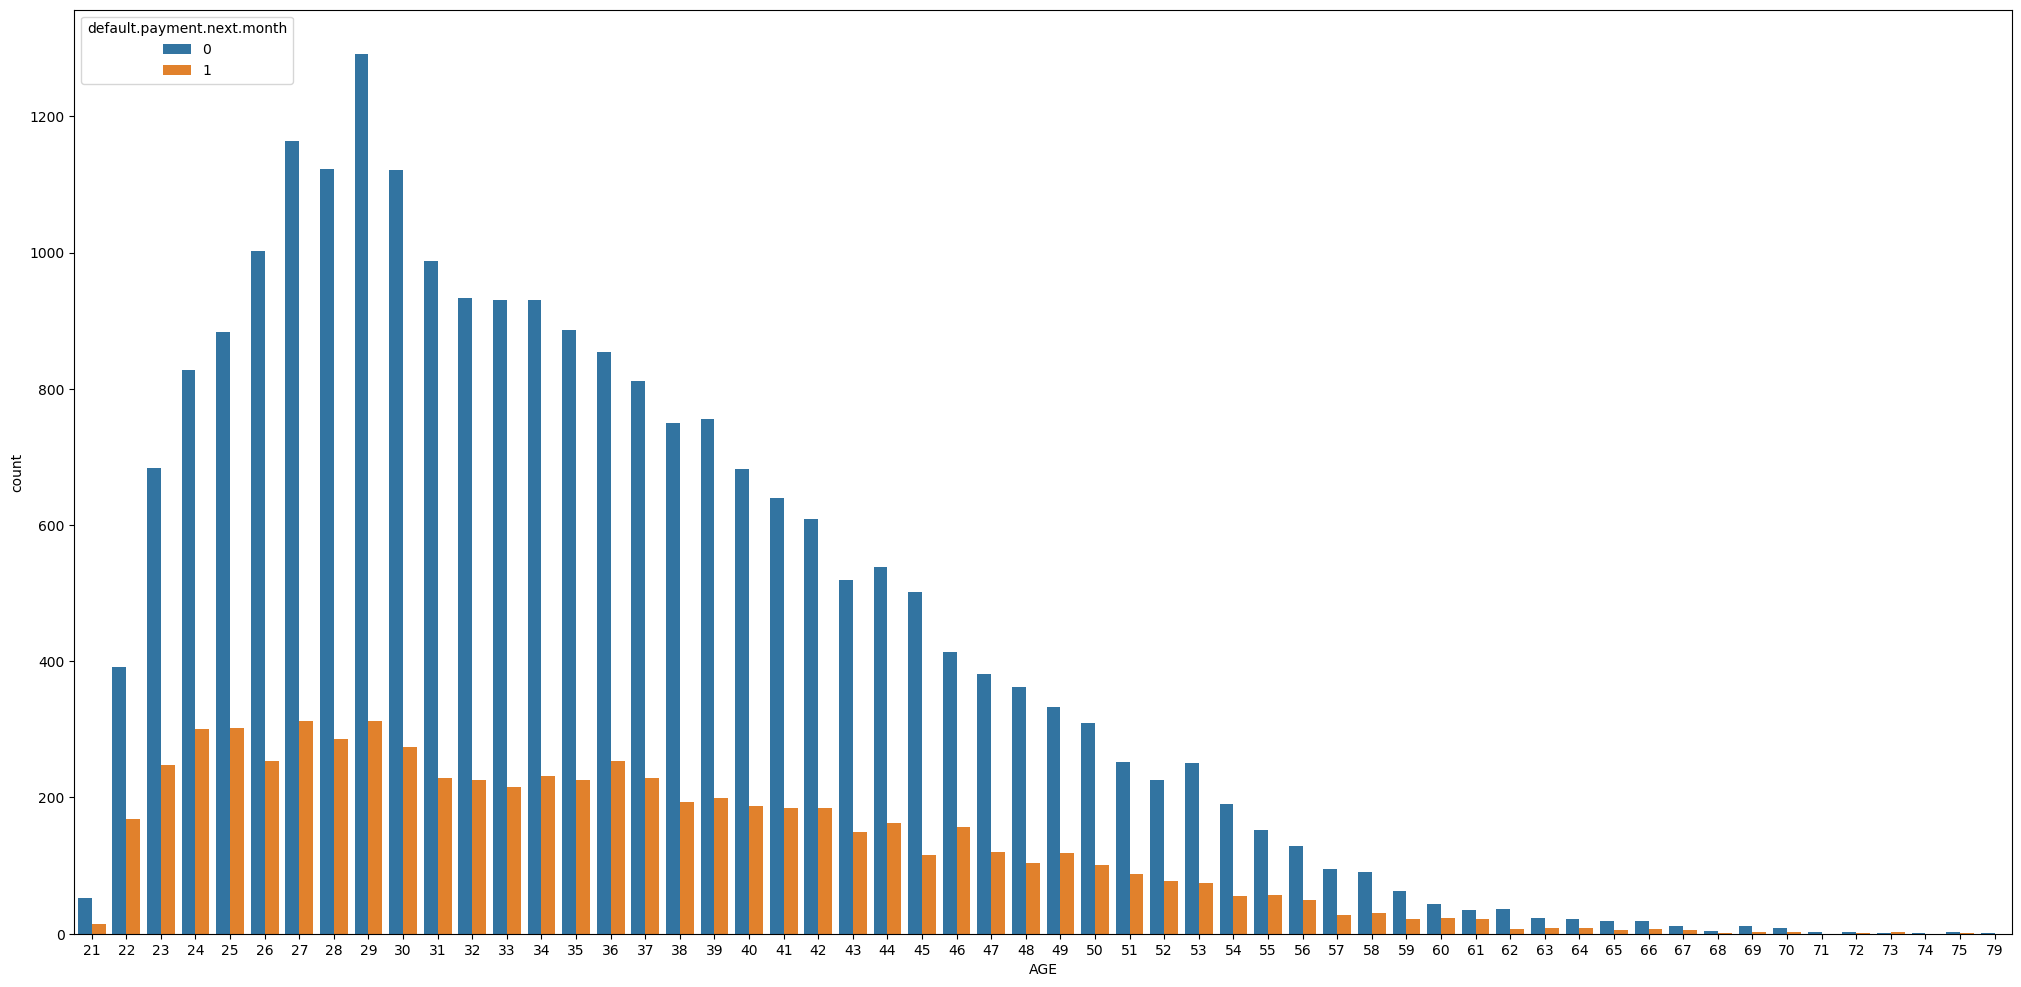

In [16]:
#plotting age for defaulters and non-defaulters
plt.figure(figsize=[25,12])
sns.countplot(x = 'AGE', hue = 'default.payment.next.month', data = bot_creditdf)
plt.show()

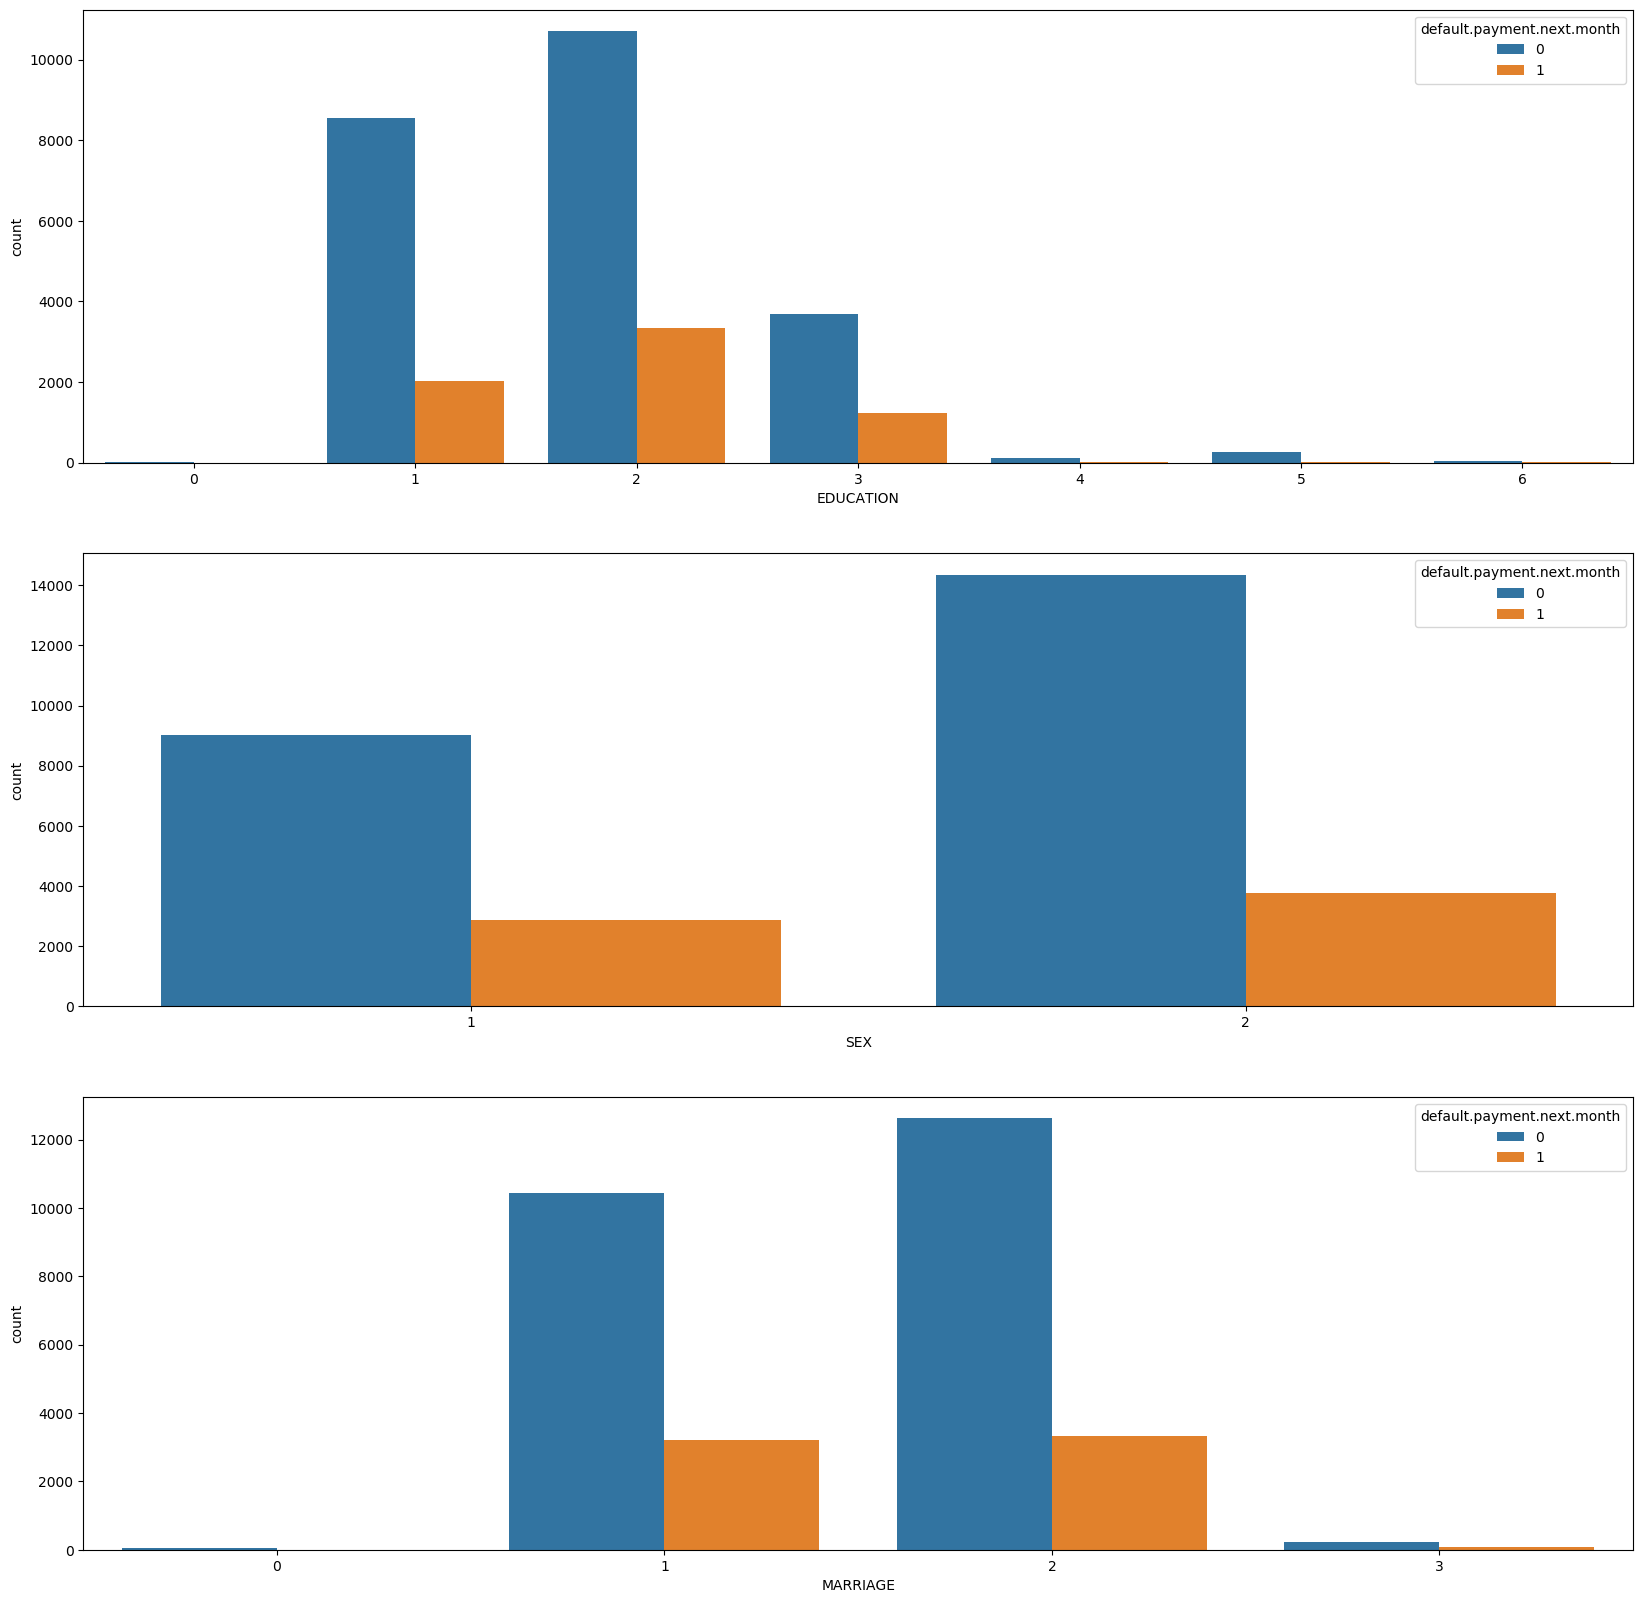

In [17]:
#plot for education, sex and marriage
plt.figure(figsize=[20,20])
plt.subplot(311)
sns.countplot(x = 'EDUCATION', hue = 'default.payment.next.month', data = bot_creditdf)
plt.subplot(312)
sns.countplot(x = 'SEX', hue = 'default.payment.next.month', data = bot_creditdf)
plt.subplot(313)
sns.countplot(x = 'MARRIAGE', hue = 'default.payment.next.month', data = bot_creditdf)
plt.show()

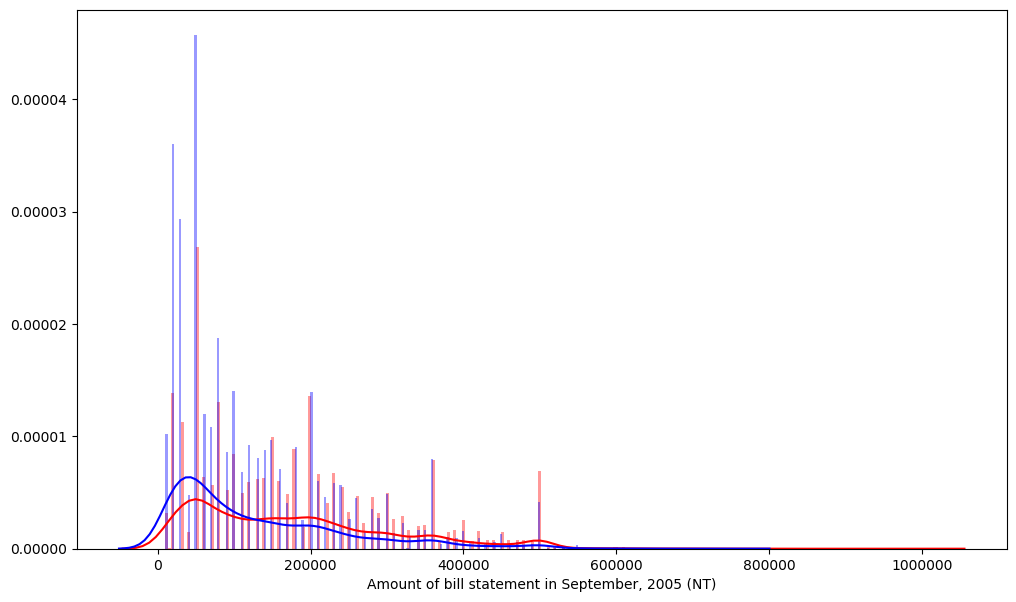

In [18]:
#Computing KDE(Kernel Density Estimate) to describe probability density of a continuos variable
#finding distance plots for defaulters and non-defaulers focusing of LIMIT_BAL

plt.figure(figsize=(12,7))

sns.distplot(bot_credit_nodefaultdf['LIMIT_BAL'], bins = 250, color = 'r')
sns.distplot(bot_credit_defaultdf['LIMIT_BAL'], bins = 250, color = 'b')

plt.xlabel('Amount of bill statement in September, 2005 (NT)')
plt.show()

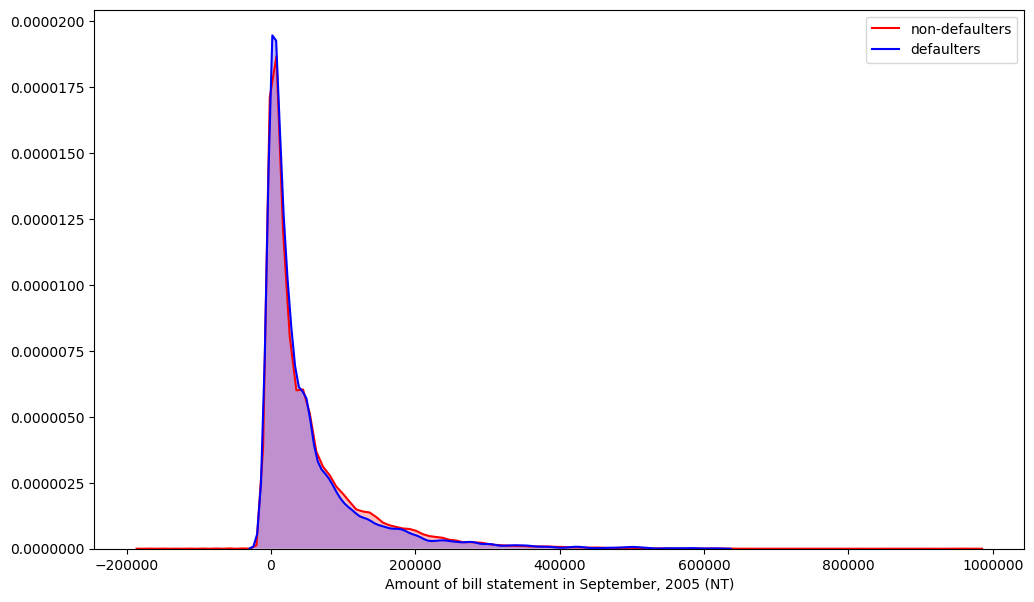

In [19]:
#Computing KDE(Kernel Density Estimate) to describe probability density of a continuos variable

plt.figure(figsize=(12,7))

sns.kdeplot(bot_credit_nodefaultdf['BILL_AMT1'], label = 'non-defaulters', shade = True, color = 'r')
sns.kdeplot(bot_credit_defaultdf['BILL_AMT1'], label = 'defaulters', shade = True, color = 'b')

plt.xlabel('Amount of bill statement in September, 2005 (NT)')
plt.show()

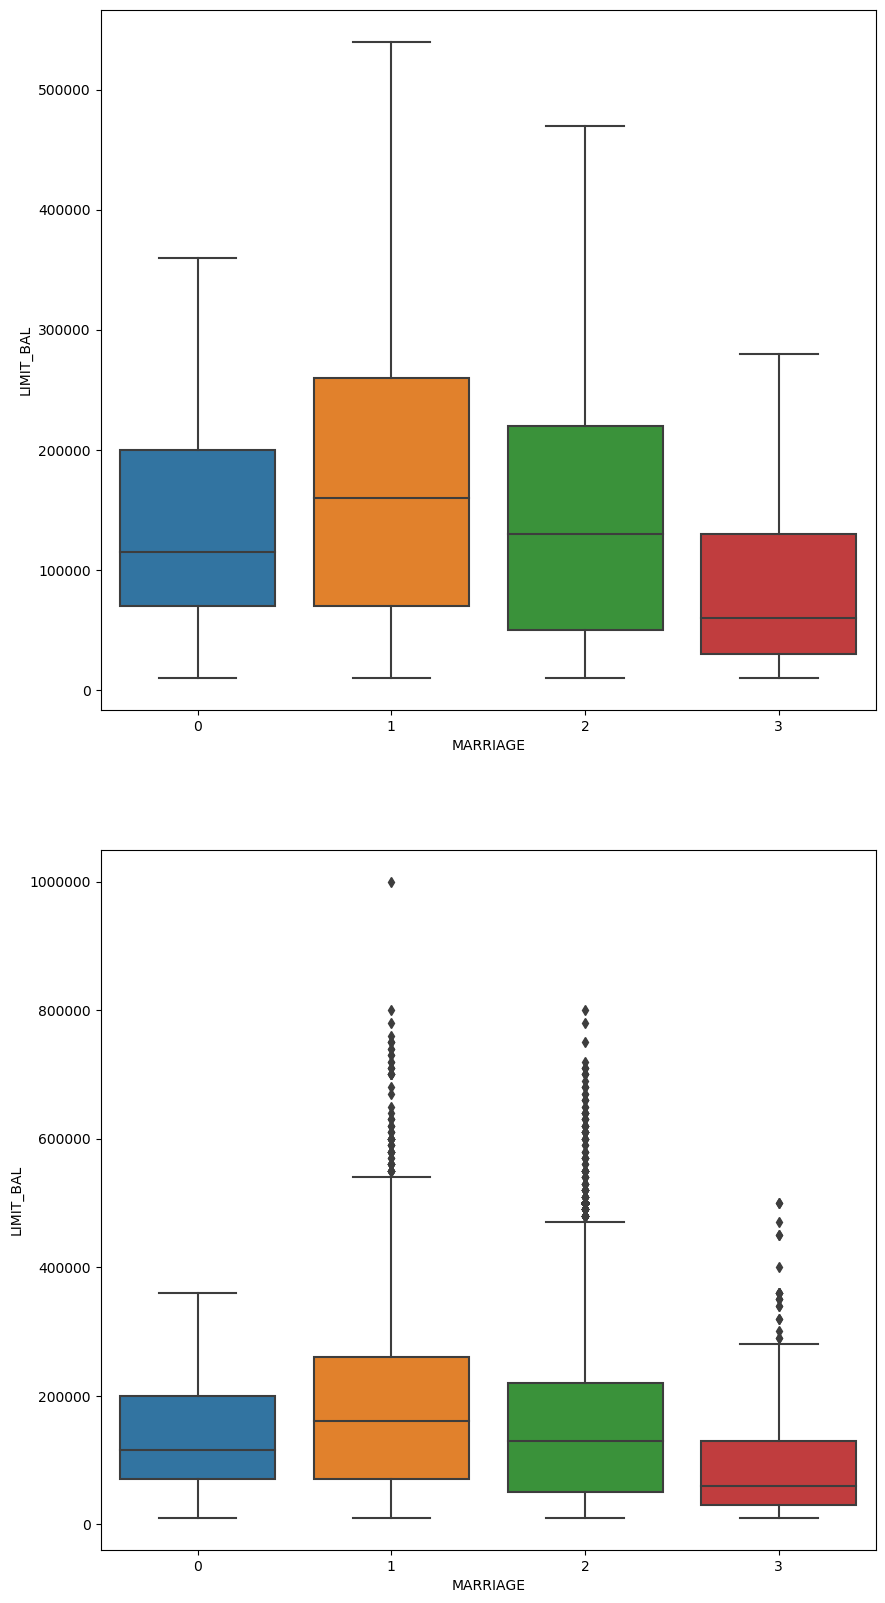

In [20]:
#boxplot for limit balance against marital status(with ouliers disabled and enabled respectively)

plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = bot_creditdf, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = bot_creditdf)
plt.show()

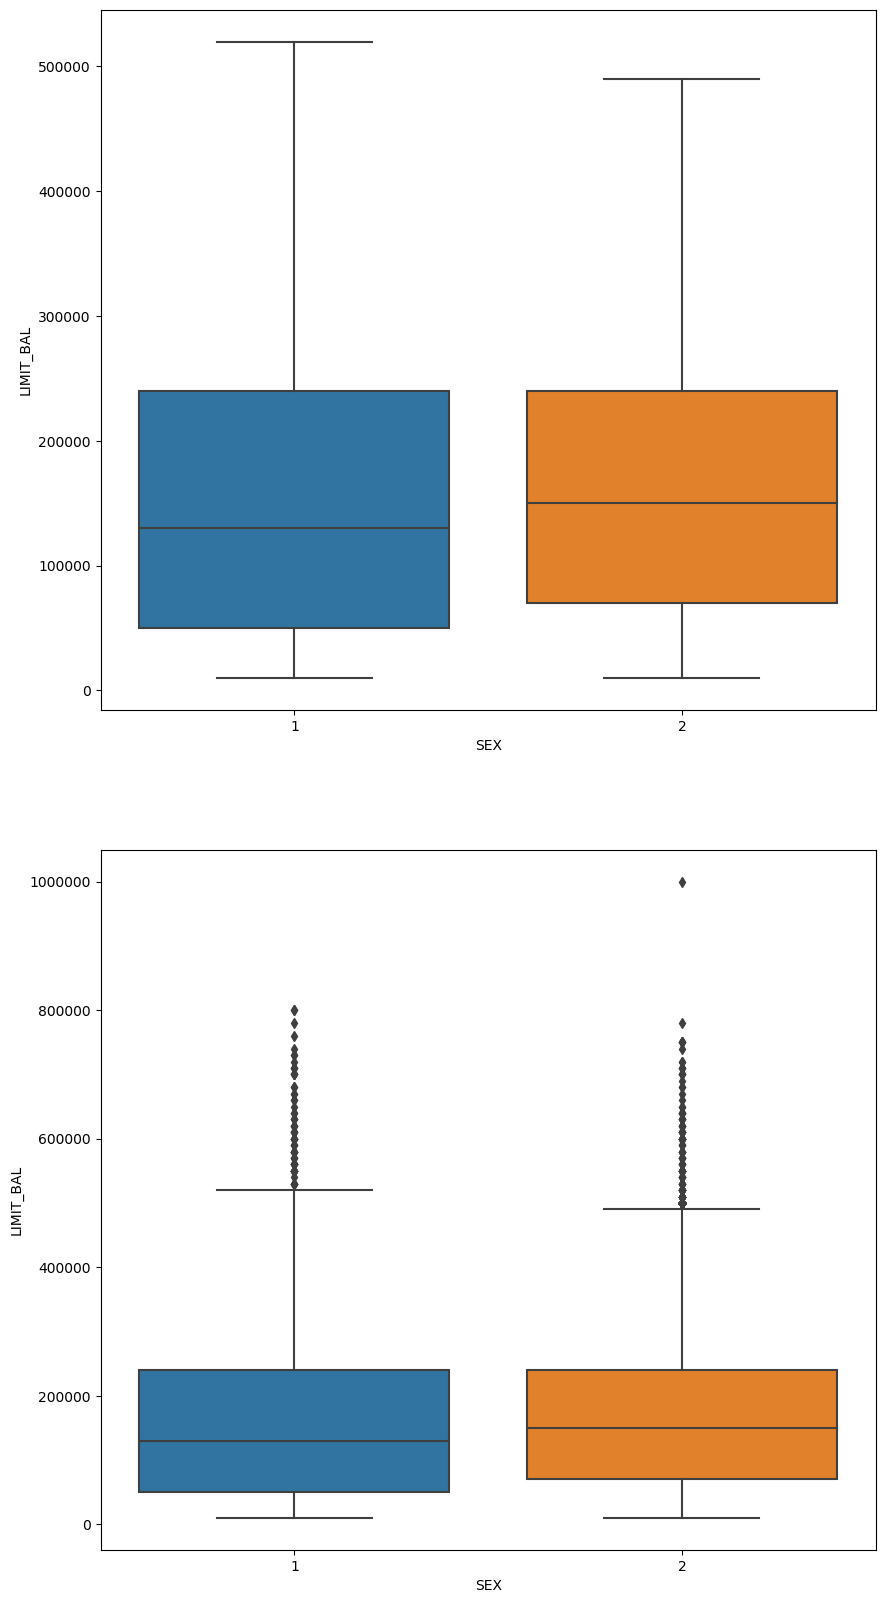

In [21]:
#boxplot for limit balance against sex(with ouliers disabled and enabled respectively)

plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = bot_creditdf, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = bot_creditdf)
plt.show()

In [22]:
bot_creditdf

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [23]:
#singling out categorical variables
X_cat = bot_creditdf[['SEX','EDUCATION','MARRIAGE']]
X_cat 

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


In [24]:
#using one-hot encoding to process info derived from categircal values
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [25]:
X_cat.shape

(30000, 13)

In [26]:
X_cat = pd.DataFrame(X_cat)

In [27]:
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
#separating all numeric data
X_numeric = bot_creditdf[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
                         'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                          'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
X_numeric

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [29]:
#concatenate categorical data w/ numerical data
X_all = pd.concat([X_cat,X_numeric],axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [30]:
#Scaling features and deriving final variable of input data for training
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(X_all)

In [31]:
y = bot_creditdf['default.payment.next.month']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [32]:
#using sklearn to train and evaluate xg-boost classifier model (local)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [33]:
X_train.shape

(22500, 33)

In [34]:
X_test.shape

(7500, 33)

In [35]:
!pip install xgboost

Keyring is skipped due to an exception: 'keyring.backends'


In [36]:
#Training of XG-B regressor model
import xgboost as xgb
model = xgb.XGBClassifier(objective='reg:squarederror', learning_rate = 0.1, max_depth = 20, n_estimators = 500)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, objective='reg:squarederror',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [37]:
#predictions after training
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

In [38]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
#check performance of model
from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy {} %".format(100 * accuracy_score(y_pred, y_test)))

Accuracy 79.90666666666667 %


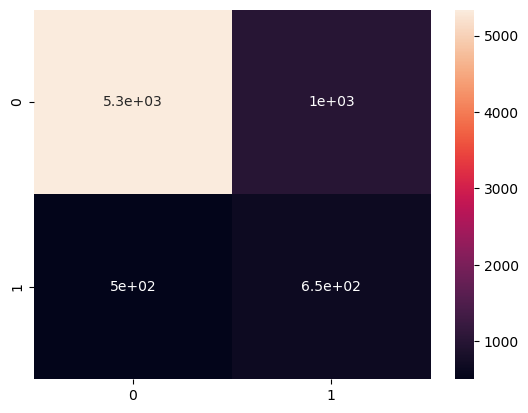

In [40]:
#Testing set performance
confm = confusion_matrix(y_pred, y_test)
sns.heatmap(confm, annot = True)
plt.show()

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      5840
           1       0.57      0.39      0.46      1660

    accuracy                           0.80      7500
   macro avg       0.70      0.65      0.67      7500
weighted avg       0.78      0.80      0.79      7500



In [42]:
#grid search to optimise xgboost hyperparameters
param_grid = {
    'gamma':[0.5, 1, 5], #regularization parameter
    'subsample':[0.6, 0.8, 1.0], #% of rows taken to build each tree
    'colsample_bytree': [0.6, 0.8, 1.0], #no. of colums used by each tree
    'max_depth': [3, 4, 5] #depth of each tree
}


In [43]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb_model, param_grid, refit = True, verbose = 4)
grid.fit(X_train, y_train)
                          

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.816, total=   1.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.811, total=   1.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.813, total=   1.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.3s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.810, total=   1.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.813, total=   1.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8, score=0.817, total=   1.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8, score=0.811, total=   1.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8, score=0.813, total=   1.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8, score=0.810, total=   1.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[CV]  cols

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 17.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01,...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=None,
                 

In [44]:
y_optim_pred = grid.predict(X_test)

In [45]:
y_optim_pred

array([0, 0, 0, ..., 0, 0, 0])

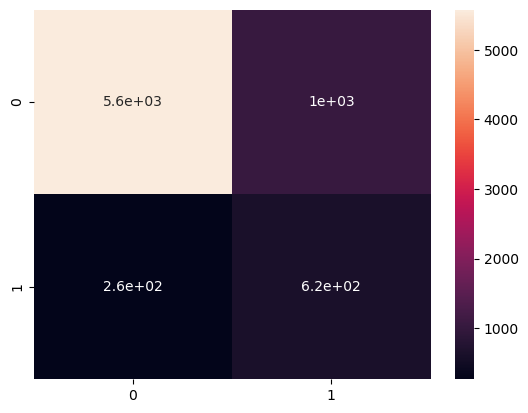

In [46]:
#Testing Set peformance
conmat = confusion_matrix(y_optim_pred, y_test)
sns.heatmap(conmat, annot = True)
plt.show()

In [47]:
print(classification_report(y_test, y_optim_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      5840
           1       0.70      0.37      0.49      1660

    accuracy                           0.83      7500
   macro avg       0.77      0.66      0.69      7500
weighted avg       0.81      0.83      0.80      7500



In [48]:
X_train.shape

(22500, 33)

In [49]:
y_train.shape

(22500,)

In [50]:
#Converting the array into dataframe in a wat that the target variables is set as the first column then followed by feature columns
#SageMaker algorithm expects data in such format

train_data = pd.DataFrame({'Target': y_train})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [51]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
3802,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.103981,0.189738,0.083538,0.262108,0.071859,0.000000,0.000000,0.000000,0.003446,0.110820
16492,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.113792,0.193595,0.116767,0.290055,0.002290,0.000950,0.002232,0.002415,0.004689,0.003783
23852,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.125822,0.228831,0.152373,0.319005,0.003778,0.001900,0.003125,0.001932,0.010550,0.005675
19065,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.124822,0.226924,0.155344,0.317850,0.000000,0.001856,0.002877,0.009043,0.000000,0.005675
19085,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.124489,0.225683,0.149650,0.313795,0.003663,0.001959,0.003460,0.004509,0.006096,0.005561


In [52]:
val_data = pd.DataFrame({'Target':y_test})
for i in range(X_test.shape[1]):
    val_data[i] = X_test[:,i]

In [53]:
val_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
12208,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.091718,0.169461,0.090273,0.260846,0.011791,0.000594,0.000558,0.000322,0.000000,0.019294
15176,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.129556,0.232241,0.155373,0.319773,0.003338,0.001781,0.003348,0.004831,0.007034,0.005107
10725,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.145496,0.254520,0.164205,0.319657,0.004236,0.002378,0.004464,0.004831,0.006865,0.003783
10090,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.134840,0.229578,0.137089,0.297989,0.005834,0.001603,0.004483,0.012755,0.023820,0.010581
23412,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.101124,0.188210,0.120740,0.300424,0.011448,0.005948,0.016764,0.024155,0.046890,0.037831


In [54]:
val_data.shape

(7500, 34)

In [55]:
#Saving train_data and val_data as csv files
train_data.to_csv('train.csv',header = False, index = False)
val_data.to_csv('validation.csv',header = False, index = False)

In [56]:
#Boto3 - AWS SDK for Python
#Allows for software to use services such as S3 Buckets and EC2 instance

import sagemaker
import boto3

#Creating SageMaker session
sagemaker_session = sagemaker.Session()

#S3 Bucket
bucket = 'bot-credit-default'
prefix = 'XGBoost-classifier'
key = 'XGBoost-classifier'

#creating role to give learning and hosting access to data
role = sagemaker.get_execution_role()

In [57]:
print(role)

arn:aws:iam::835930285231:role/service-role/AmazonSageMaker-ExecutionRole-20221126T172504


In [58]:
#Reading data from CSV file then upload data to s3 Bucket
import os
with open('train.csv','rb') as f:
    #code to upload data into s3 bucket
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

#training data location in s3 bucket
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('Uploaded training data location: {}'.format(s3_train_data))

Uploaded training data location: s3://bot-credit-default/XGBoost-classifier/train/XGBoost-classifier


In [59]:
with open('validation.csv','rb') as f:
    #code to upload data into s3 bucket
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)

#validation data location in s3 bucket
s3_val_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('Uploaded validation data location: {}'.format(s3_val_data))

Uploaded validation data location: s3://bot-credit-default/XGBoost-classifier/validation/XGBoost-classifier


In [60]:
#output placeholder in s3 bucket to store output

output_loc = 's3://{}/{}/output'.format(bucket, prefix)
print('training output will be uploaded to: {}'.format(output_loc))

training output will be uploaded to: s3://bot-credit-default/XGBoost-classifier/output


In [61]:
#get training container of sagemaker built-in algorithm

from sagemaker.amazon.amazon_estimator import get_image_uri
container = get_image_uri(boto3.Session().region_name, 'xgboost','1.0-1')

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


In [63]:
#Specifying type of instance to be used in training
#Including output path and sagemaker session into estimator

Xgboost_classifier = sagemaker.estimator.Estimator(container,role,train_instance_count=1,train_instance_type='ml.m4.xlarge',output_path=output_loc,sagemaker_session=sagemaker_session)

#hyperparameter tuning to improve model performance
Xgboost_classifier.set_hyperparameters(max_depth=3,objective='multi:softmax',num_class = 2,eta = 0.5,num_round = 150)

Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


In [65]:
#Creation of "train" and "validation" channels to feed into the model
#Source for channel cretion code: https://docs.aws.amazon.com/sagemaker/latest/dg/ex1-train-model.html


train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv', s3_data_type = 'S3Prefix')
val_input = sagemaker.session.s3_input(s3_data = s3_val_data, content_type='csv', s3_data_type = 'S3Prefix')
data_channels= {'train':train_input, 'validation':val_input}
Xgboost_classifier.fit(data_channels)

's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


2022-11-28 17:11:57 Starting - Starting the training job...
2022-11-28 17:12:24 Starting - Preparing the instances for training............
2022-11-28 17:14:10 Downloading - Downloading input data...
2022-11-28 17:14:51 Training - Training image download completed. Training in progress...INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[17:15:02] 22500x33 matrix with 742500 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
INFO:root:Determined delimiter of CSV input is ','
[17:15:02] 7500x33 ma

In [66]:
#Deploy model to perform inferences
Xgboost_classifier = Xgboost_classifier.deploy(initial_instance_count=1, instance_type = 'ml.m4.xlarge')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


------!

In [67]:
#including serializer and deserializer
from sagemaker.predictor import csv_serializer, json_deserializer

Xgboost_classifier.content_type = 'text/csv'
Xgboost_classifier.serializer = csv_serializer
Xgboost_classifier.deserializer = None

In [68]:
#making prediction
XGB_Prediction = Xgboost_classifier.predict(np.array(X_test))

In [70]:
XGB_Prediction

b'0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [76]:
#code to convert values i bytes format to array

def bytes_2_array(x):
    
    #prediction as string and split based on ','
    l = str(x).split(',')
    
    #Removing umwanted characters
    l[0] = l[0][2:]
    l[-1] = l[-1][:-1]
    
    #iterating through list of strings and converting them to float types
    for i in range(len(l)):
        l[i] = float(l[i])
        
    #converting the lsit into an array
    l = np.array(l).astype('float32')
    
    #reshape 1-d array to 2-d array
    return l.reshape(-1,1)
    

In [77]:
predicted_values = bytes_2_array(XGB_Prediction)

In [78]:
predicted_values

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [80]:
#converting y_test to numpy array and reshaping
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

In [81]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [82]:
#plotting performance metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_test, predicted_values, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, predicted_values)))
print("Recall = {}".format(recall_score(y_test, predicted_values, average='macro')))

Precision = 0.7487570944608211
Accuracy = 0.8182666666666667
Recall = 0.6603864086482918


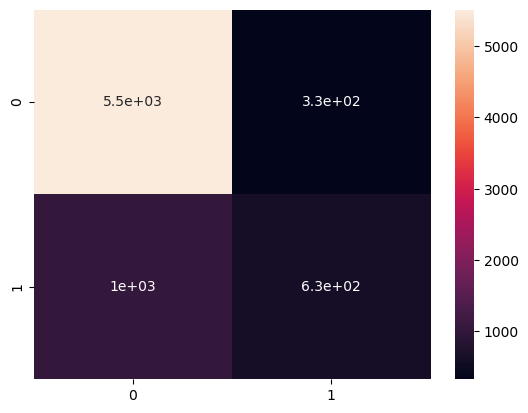

In [85]:
#plotting confusion matrix

from sklearn.metrics import confusion_matrix
confm = confusion_matrix(y_test, predicted_values)
sns.heatmap(confm, annot = True)
plt.show()

In [ ]:
Xgboost_classifier